# Introducción a la Ciencia de Datos 2019-1
## Docente: Nelson Enrique Vera
### Estudiantes:
### Leidy Marcela Aldana Burgos  
- Código: 20151020019 - LeidyMarcelaAldana@gmail.com

### Andrés Mauricio Acosta Pulido 
- Código: 20142020111 - AndresAcostaPulido96@gmail.com

## Generación de un kernel para SVC y uso de redes neuronales supervisadas

In [381]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
import random

In [382]:
#value = np.array([[-8,-7,-6,-5,-3,-2,2,3,5,6,7,8],[-8,-7,-6,-5,-3,-2,2,3,5,6,7,8],[-8,-7,-6,-5,-3,-2,2,3,5,6,7,8],[-8,-7,-6,-5,-3,-2,2,3,5,6,7,8],[-8,-7,-6,-5,-3,-2,2,3,5,6,7,8],[-8,-7,-6,-5,-3,-2,2,3,5,6,7,8],[-8,-7,-6,-5,-3,-2,2,3,5,6,7,8],[-8,-7,-6,-5,-3,-2,2,3,5,6,7,8],[-8,-7,-6,-5,-3,-2,2,3,5,6,7,8],[-8,-7,-6,-5,-3,-2,2,3,5,6,7,8],[-8,-7,-6,-5,-3,-2,2,3,5,6,7,8],[-8,-7,-6,-5,-3,-2,2,3,5,6,7,8]])
value = [[random.randint(1, 10)] for x in range(1000)]
#value = np.array([[-8],[-7],[-6],[-5],[-3],[-2],[2],[3],[5],[6],[7],[8]])
uno=1
cero=0
value=np.array(value)
value

array([[ 4],
       [ 6],
       [ 3],
       [10],
       [ 4],
       [ 6],
       [ 8],
       [ 5],
       [ 6],
       [ 1],
       [10],
       [ 9],
       [10],
       [ 9],
       [ 5],
       [ 9],
       [ 4],
       [ 9],
       [ 8],
       [ 7],
       [ 7],
       [ 6],
       [ 4],
       [ 4],
       [ 7],
       [ 1],
       [ 4],
       [ 9],
       [ 1],
       [10],
       [ 1],
       [ 9],
       [ 2],
       [ 4],
       [ 9],
       [10],
       [ 8],
       [ 5],
       [ 8],
       [ 7],
       [ 8],
       [ 7],
       [10],
       [ 4],
       [ 5],
       [ 3],
       [ 3],
       [10],
       [ 3],
       [ 8],
       [ 9],
       [ 4],
       [ 7],
       [ 6],
       [ 6],
       [ 7],
       [ 8],
       [ 8],
       [ 5],
       [ 5],
       [ 3],
       [ 4],
       [ 1],
       [10],
       [ 2],
       [ 8],
       [ 1],
       [ 4],
       [10],
       [ 1],
       [ 8],
       [10],
       [ 4],
       [ 8],
       [ 3],
       [ 3],
       [ 3],

In [383]:
def definirTarget(i):
    if math.fabs(i)<= 3:
        return uno
    else:
        return cero

In [384]:
target=[]
for i in value:
    target.append(definirTarget(i))
target=np.array(target)
target

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,

In [385]:
x_train, x_test, y_train, y_test = train_test_split(value, target)
x_train,y_train,x_test,y_test

(array([[ 3],
        [10],
        [ 5],
        [ 8],
        [ 6],
        [ 6],
        [ 1],
        [ 9],
        [ 7],
        [ 4],
        [ 1],
        [ 8],
        [ 9],
        [ 1],
        [ 5],
        [ 1],
        [ 1],
        [ 5],
        [10],
        [ 9],
        [10],
        [10],
        [ 8],
        [ 2],
        [ 2],
        [ 3],
        [ 2],
        [10],
        [ 3],
        [ 9],
        [10],
        [10],
        [ 2],
        [ 2],
        [ 6],
        [ 7],
        [ 7],
        [10],
        [ 3],
        [ 7],
        [ 2],
        [ 3],
        [ 5],
        [ 1],
        [ 9],
        [ 9],
        [ 1],
        [ 4],
        [10],
        [ 9],
        [ 6],
        [ 8],
        [ 9],
        [ 3],
        [ 3],
        [ 5],
        [10],
        [ 1],
        [ 5],
        [ 1],
        [ 9],
        [ 2],
        [ 3],
        [ 6],
        [ 9],
        [ 1],
        [ 8],
        [ 4],
        [ 3],
        [ 3],
        [ 1],
      

In [386]:
def my_kernel(X, Y):
    return np.dot(X,Y.T)**7
    #return np.abs(np.subtract(X,Y.T))**2

In [387]:
#clf = svm.SVC(kernel=my_kernel, C=100)
clf = svm.SVC(kernel=my_kernel,gamma=0.001, C=1000, degree=0)

In [388]:
clf

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=0, gamma=0.001,
  kernel=<function my_kernel at 0x7f5e08869a60>, max_iter=-1,
  probability=False, random_state=None, shrinking=True, tol=0.001,
  verbose=False)

In [389]:
clf.fit(x_train, y_train)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=0, gamma=0.001,
  kernel=<function my_kernel at 0x7f5e08869a60>, max_iter=-1,
  probability=False, random_state=None, shrinking=True, tol=0.001,
  verbose=False)

In [390]:
clf.score(x_test, y_test)

1.0

In [391]:
y_pred=clf.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0])

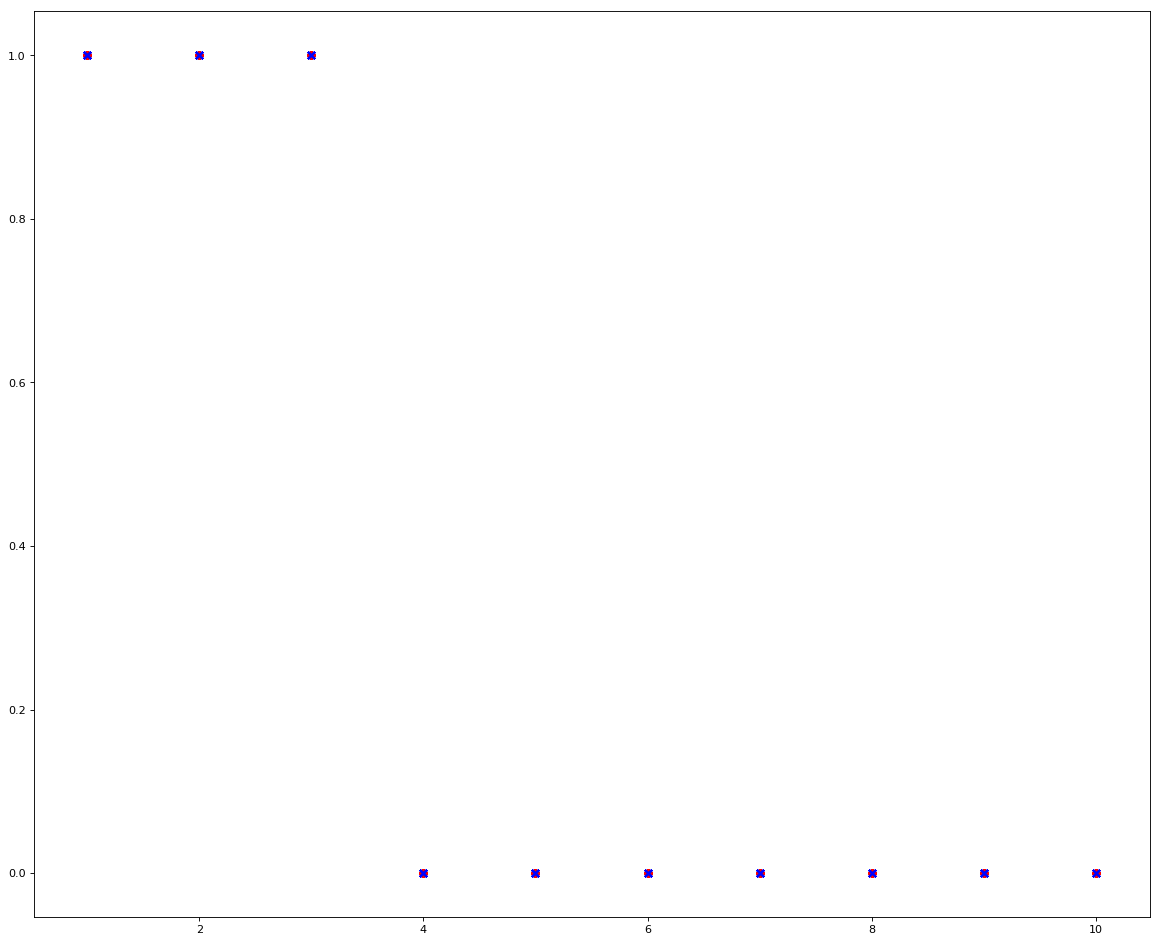

In [392]:
plt.figure(figsize=(18, 15), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(x_test, y_pred, marker='o',c='r', edgecolor='r')
plt.scatter(x_test, y_test, marker='x',c='b', edgecolor='b')
plt.show()

In [393]:
y_test, y_pred

(array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
        1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
        0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
        1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 1, 0, 0, 0]),
 array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
    